1. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


2. Loading the data

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. selecting features for the clustering

In [3]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]


4. scale the features

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


5. Using Elbow method

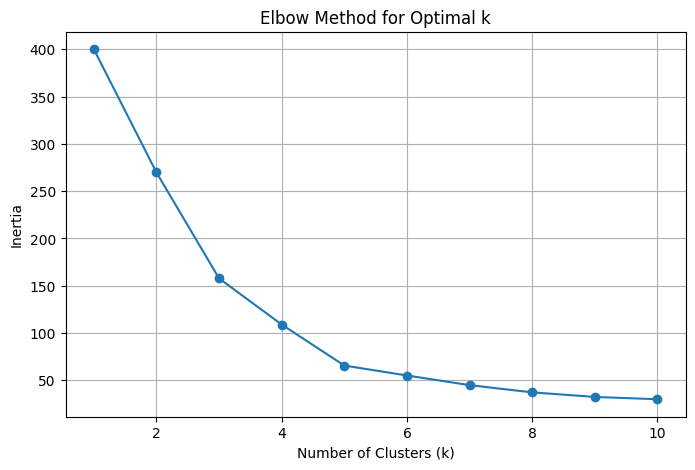

In [5]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


6. Applying k-Means(k=5)

In [6]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


7. Visualize the clusters

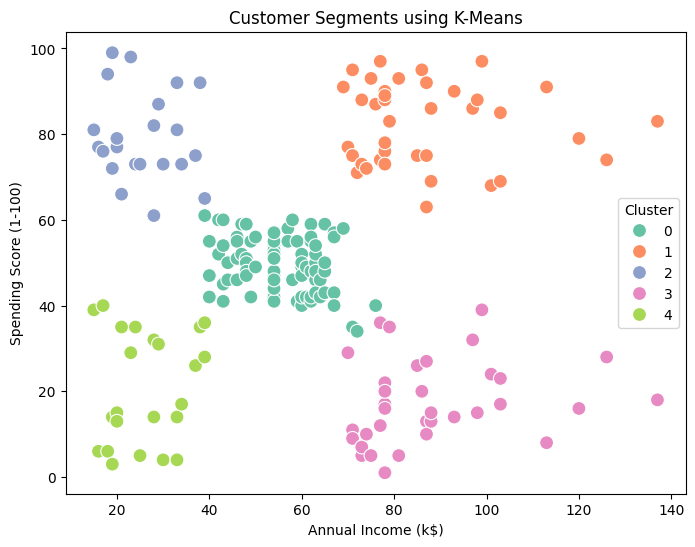

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", 
                hue="Cluster", data=df, palette="Set2", s=100)
plt.title("Customer Segments using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()


8. calculating silhouette score

In [8]:
score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", round(score, 3))

Silhouette Score: 0.555


9. Short note

- Using K-Means clustering on the Mall_Customers dataset, we identified distinct customer segments based on Annual Income and Spending Score. The Elbow Method suggested 5 optimal clusters, each representing different spending behaviors and income levels. For example, some customers have high income and high spending, making them ideal for premium targeting, while others have low income and low spending, indicating limited engagement. This segmentation helps businesses understand their customer base better and personalize marketing strategies accordingly.